<div style="direction:rtl; font-size:12px">به نام خدا</div>
<div style="direction:rtl; font-size:12px">گروه 8 : آرمین افتخاری - محمد سلیمان بهزاد - محمدرضا پوررضا - رضا برزگر طرقبه - سبحان مرادیان دقیق</div>
<div style="direction:rtl"> در این بخش با استفاده از الگوریتم KNN که یک کلاسیفایر رایج در مبحث ماشین لرنینگ می باشد استفاده کرده ایم. با استفاده از این الگوریتم می توانیم داده های train خود را کلاستر بندی کنیم. سپس مدلی ترین کنیم و با استفاده از آن به ازای هر داده تست، یک همسایگی 10 تایی از شبیه ترین داده ها را پیدا می کنیم. توضیحات بیشتر و جزئی تر در داکیومنت و خلال کد ها داده شده است.</div>

### Implementation of KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors , KNeighborsClassifier
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Reading the dataset which was preprocessed

In [2]:
book_ratings = pd.read_csv('preprocessed_ratings.csv')

In [3]:
book_ratings.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Location,Age
0,53,451,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"strafford, missouri, usa",34.0
1,53,280,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown","strafford, missouri, usa",34.0
2,53,647,0,The Da Vinci Code,Dan Brown,2003,Doubleday,"strafford, missouri, usa",34.0
3,53,2028,0,Wild Animus,Rich Shapero,2004,Too Far,"strafford, missouri, usa",34.0
4,53,241,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,"strafford, missouri, usa",34.0


In [4]:
books = book_ratings.filter(['Book_Title' , 'Book_Author', 'Year_Of_Publication','Publisher', 'Book_Rating']).copy()
books = books.drop_duplicates(subset='Book_Title', keep='first')

In [5]:
 with open('sim_matrix', 'rb') as fp:
    sim_matrix = pickle.load(fp)

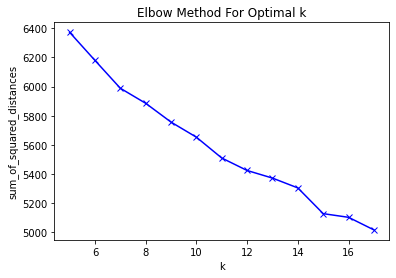

In [16]:
sum_of_squared_distances = []
K = range(5,18)

for k in K:
    km = KMeans(n_clusters=k, n_init=20)
    km = km.fit(sim_matrix)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=50)
model.fit(sim_matrix)
labels=model.labels_
books['label'] = labels

In [8]:
groups = books.groupby(by=['label'])
groups.first()

,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
label,,,,,
0,Two for the Dough,Janet Evanovich,1996,Pocket,0
1,Q Is for Quarry,Sue Grafton,2002,Putnam Publishing Group,0
2,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",0
3,The Green Mile,Stephen King,1999,Pocket,0
4,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,0
5,Dance upon the Air (Three Sisters Island Trilogy),Nora Roberts,2003,Jove Books,0
6,The Long Road Home,Danielle Steel,1999,Dell Publishing Company,0


In [10]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [11]:
len(train_data), len(test_data)

(1530, 383)

In [12]:
train_X = train_data.drop(['label'],axis=1)
train_Y = train_data['label']

test_X = test_data.drop(['label'],axis=1)
test_Y = test_data['label']

In [13]:
encoder = LabelEncoder()
for col in train_X.columns:
    train_X[col] = encoder.fit_transform(train_X[col])
    
for col in test_X.columns :
    test_X[col] = encoder.fit_transform(test_X[col])

In [14]:
knn = KNeighborsClassifier(n_neighbors=50, algorithm='auto', weights='distance')
knn.fit(train_X, train_Y)
predict = knn.predict(test_X)
accuracy_score(test_Y, predict)

0.8015665796344648